# Used Cars in Egypt Final Project

### Installing librairies and reading the file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Unnamed: 0,Year,Price
count,14741.000000,14741.000000,14741.000000
mean,8934.846754,2005.456821,116.584987
std,4922.065495,12.655566,82.192718
min,812.000000,1970.000000,3.000000
25%,4497.000000,1998.000000,43.700000
50%,8182.000000,2010.000000,110.000000
75%,13373.000000,2015.000000,161.000000
max,17058.000000,2022.000000,471.500000


### Preprocessing

In [6]:
df.duplicated().sum()

0

In [7]:
df['Kilometers'].unique()

array(['140000 to 159999', '180000 to 199999', '10000 to 19999',
       'More than 200000', '90000 to 99999', '100000 to 119999',
       '160000 to 179999', '120000 to 139999', '0 to 9999',
       '20000 to 29999', '30000 to 39999', '80000 to 89999',
       '60000 to 69999', '70000 to 79999', '40000 to 49999',
       '50000 to 59999'], dtype=object)

In [8]:
kilo = df['Kilometers'].str.split(' to ', expand = True)

In [9]:
kilo[0].unique()

array(['140000', '180000', '10000', 'More than 200000', '90000', '100000',
       '160000', '120000', '0', '20000', '30000', '80000', '60000',
       '70000', '40000', '50000'], dtype=object)

In [10]:
kilo[1].unique()

array(['159999', '199999', '19999', None, '99999', '119999', '179999',
       '139999', '9999', '29999', '39999', '89999', '69999', '79999',
       '49999', '59999'], dtype=object)

In [11]:
df['min_kilometers'] = kilo[0]

In [12]:
df['max_kilometers'] = kilo[1]

In [13]:
df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,min_kilometers,max_kilometers
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza,140000,159999
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena,180000,199999
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza,140000,159999
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo,140000,159999
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza,10000,19999


In [14]:
df['min_kilometers'] = df['min_kilometers'].replace('More than 200000', '200000', regex = True)

In [15]:
df['min_kilometers'].astype(int)

0        140000
1        180000
2        140000
3        140000
4         10000
          ...  
14736    160000
14737     20000
14738     10000
14739     10000
14740     30000
Name: min_kilometers, Length: 14741, dtype: int32

In [16]:
df.describe()

,Unnamed: 0,Year,Price
count,14741.000000,14741.000000,14741.000000
mean,8934.846754,2005.456821,116.584987
std,4922.065495,12.655566,82.192718
min,812.000000,1970.000000,3.000000
25%,4497.000000,1998.000000,43.700000
50%,8182.000000,2010.000000,110.000000
75%,13373.000000,2015.000000,161.000000
max,17058.000000,2022.000000,471.500000


In [17]:
index = df[df['min_kilometers']=='200000'].index

In [18]:
df.iloc[index]

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,min_kilometers,max_kilometers
5,5342,Hyundai,Accent,Sedan,Green,2000,Benzine,More than 200000,1000 - 1300 CC,Manual,57.0,Cairo,200000,None
14,5351,Hyundai,Accent,Sedan,Other Color,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,67.0,Suez,200000,None
18,5355,Hyundai,Accent,Sedan,Gray,1996,Benzine,More than 200000,1600 CC,Manual,75.0,Alexandria,200000,None
19,5356,Hyundai,Accent,Sedan,Silver,2008,Benzine,More than 200000,1400 - 1500 CC,Manual,130.0,Minya,200000,None
21,5358,Hyundai,Accent,Sedan,Gold,2005,Benzine,More than 200000,1400 - 1500 CC,Manual,69.0,Kafr al-Sheikh,200000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,14166,Fiat,Uno,Hatchback,Silver,2004,Benzine,More than 200000,1000 - 1300 CC,Manual,51.8,Giza,200000,None
14694,14167,Fiat,Uno,Hatchback,Red,2000,Benzine,More than 200000,1000 - 1300 CC,Manual,57.5,Damietta,200000,None
14697,14170,Fiat,Uno,Hatchback,Blue- Navy Blue,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,51.8,Alexandria,200000,None
14704,14177,Fiat,Uno,Hatchback,Silver,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,51.8,Damietta,200000,None


In [19]:
df['max_kilometers'].unique()

array(['159999', '199999', '19999', None, '99999', '119999', '179999',
       '139999', '9999', '29999', '39999', '89999', '69999', '79999',
       '49999', '59999'], dtype=object)

In [20]:
df = df.fillna(value = '300000')

In [21]:
df.iloc[index]

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,min_kilometers,max_kilometers
5,5342,Hyundai,Accent,Sedan,Green,2000,Benzine,More than 200000,1000 - 1300 CC,Manual,57.0,Cairo,200000,300000
14,5351,Hyundai,Accent,Sedan,Other Color,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,67.0,Suez,200000,300000
18,5355,Hyundai,Accent,Sedan,Gray,1996,Benzine,More than 200000,1600 CC,Manual,75.0,Alexandria,200000,300000
19,5356,Hyundai,Accent,Sedan,Silver,2008,Benzine,More than 200000,1400 - 1500 CC,Manual,130.0,Minya,200000,300000
21,5358,Hyundai,Accent,Sedan,Gold,2005,Benzine,More than 200000,1400 - 1500 CC,Manual,69.0,Kafr al-Sheikh,200000,300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,14166,Fiat,Uno,Hatchback,Silver,2004,Benzine,More than 200000,1000 - 1300 CC,Manual,51.8,Giza,200000,300000
14694,14167,Fiat,Uno,Hatchback,Red,2000,Benzine,More than 200000,1000 - 1300 CC,Manual,57.5,Damietta,200000,300000
14697,14170,Fiat,Uno,Hatchback,Blue- Navy Blue,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,51.8,Alexandria,200000,300000
14704,14177,Fiat,Uno,Hatchback,Silver,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,51.8,Damietta,200000,300000


In [22]:
df['Engine'].unique()

array(['1600 CC', '1000 - 1300 CC', '1400 - 1500 CC'], dtype=object)

In [23]:
df['Engine'] = df['Engine'].replace('1600 CC', '1600', regex = True)
df['Engine'] = df['Engine'].replace('1000 - 1300 CC', '1300', regex = True)
df['Engine'] = df['Engine'].replace('1400 - 1500 CC', '1500', regex = True)

In [24]:
df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,min_kilometers,max_kilometers
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600,Automatic,140.0,Giza,140000,159999
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1300,Manual,78.0,Qena,180000,199999
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1500,Manual,70.0,Giza,140000,159999
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600,Automatic,150.0,Cairo,140000,159999
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1300,Manual,75.0,Giza,10000,19999


In [25]:
df = df.drop(['Kilometers'], axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      14741 non-null  int64  
 1   Brand           14741 non-null  object 
 2   Model           14741 non-null  object 
 3   Body            14741 non-null  object 
 4   Color           14741 non-null  object 
 5   Year            14741 non-null  int64  
 6   Fuel            14741 non-null  object 
 7   Engine          14741 non-null  object 
 8   Transmission    14741 non-null  object 
 9   Price           14741 non-null  float64
 10  Gov             14741 non-null  object 
 11  min_kilometers  14741 non-null  object 
 12  max_kilometers  14741 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [27]:
df['min_kilometers'] = df['min_kilometers'].astype(int)
df['max_kilometers'] = df['max_kilometers'].astype(int)
df['Engine'] = df['Engine'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      14741 non-null  int64  
 1   Brand           14741 non-null  object 
 2   Model           14741 non-null  object 
 3   Body            14741 non-null  object 
 4   Color           14741 non-null  object 
 5   Year            14741 non-null  int64  
 6   Fuel            14741 non-null  object 
 7   Engine          14741 non-null  int32  
 8   Transmission    14741 non-null  object 
 9   Price           14741 non-null  float64
 10  Gov             14741 non-null  object 
 11  min_kilometers  14741 non-null  int32  
 12  max_kilometers  14741 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 1.3+ MB


In [29]:
df.describe()

,Unnamed: 0,Year,Engine,Price,min_kilometers,max_kilometers
count,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000
mean,8934.846754,2005.456821,1496.716641,116.584987,102767.790516,131703.938946
std,4922.065495,12.655566,120.035354,82.192718,70006.335315,95931.306805
min,812.000000,1970.000000,1300.000000,3.000000,0.000000,9999.000000
25%,4497.000000,1998.000000,1500.000000,43.700000,30000.000000,39999.000000
50%,8182.000000,2010.000000,1500.000000,110.000000,100000.000000,119999.000000
75%,13373.000000,2015.000000,1600.000000,161.000000,180000.000000,199999.000000
max,17058.000000,2022.000000,1600.000000,471.500000,200000.000000,300000.000000


In [30]:
index1 = df.loc[(df['Price'] <= 10) & (df['Year'] >= 2000)].index

In [31]:
df = df.drop(index1, axis=0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14717 entries, 0 to 14740
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      14717 non-null  int64  
 1   Brand           14717 non-null  object 
 2   Model           14717 non-null  object 
 3   Body            14717 non-null  object 
 4   Color           14717 non-null  object 
 5   Year            14717 non-null  int64  
 6   Fuel            14717 non-null  object 
 7   Engine          14717 non-null  int32  
 8   Transmission    14717 non-null  object 
 9   Price           14717 non-null  float64
 10  Gov             14717 non-null  object 
 11  min_kilometers  14717 non-null  int32  
 12  max_kilometers  14717 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 1.4+ MB


In [33]:
df = df.drop(['Unnamed: 0'], axis=1)

In [34]:
df = df.drop(['Color'], axis = 1)

### EDA

#### what is the most year has most cars manufactured and used?

In [35]:
df['Year'].mode()

0    2013
dtype: int64

<AxesSubplot:>

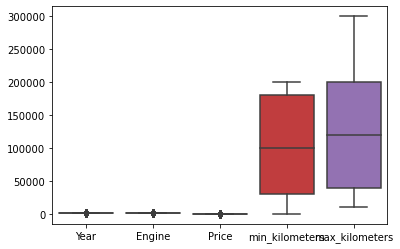

In [36]:
sns.boxplot(data = df)

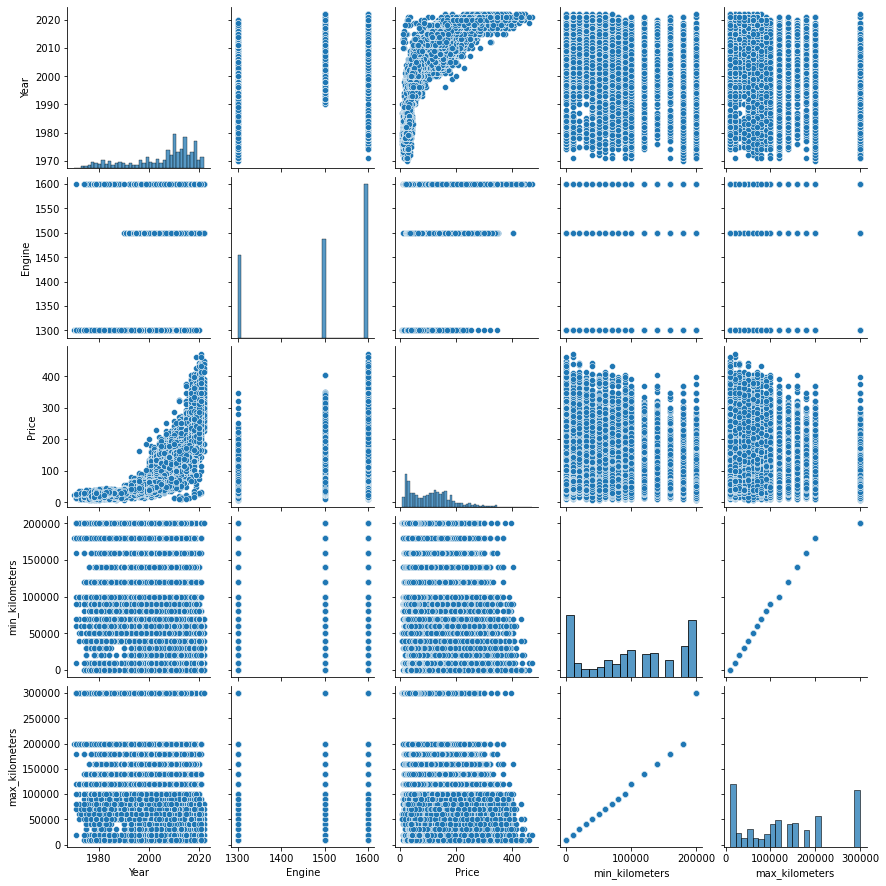

In [37]:
sns.pairplot(df)

In [38]:
df.corr()

,Year,Engine,Price,min_kilometers,max_kilometers
Year,1.000000,0.628755,0.777038,-0.237114,-0.254439
Engine,0.628755,1.000000,0.602197,-0.222598,-0.222283
Price,0.777038,0.602197,1.000000,-0.223680,-0.243491
min_kilometers,-0.237114,-0.222598,-0.223680,1.000000,0.971523
max_kilometers,-0.254439,-0.222283,-0.243491,0.971523,1.000000


#### How the body type affects the price?

<AxesSubplot:xlabel='Body', ylabel='Price'>

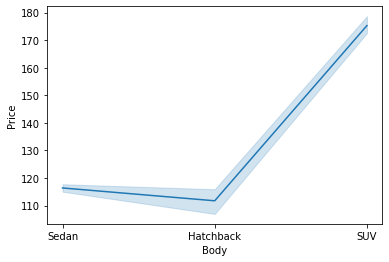

In [39]:
sns.lineplot(x = df['Body'], y = df['Price'])

#### Which govs we can find the many cars for sale with many varieties?

C:\Users\Pierre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Giza'),
  Text(1, 0, 'Qena'),
  Text(2, 0, 'Cairo'),
  Text(3, 0, 'Minya'),
  Text(4, 0, 'Alexandria'),
  Text(5, 0, 'Dakahlia'),
  Text(6, 0, 'Suez'),
  Text(7, 0, 'Sharqia'),
  Text(8, 0, 'Kafr al-Sheikh'),
  Text(9, 0, 'Beheira'),
  Text(10, 0, 'Ismailia'),
  Text(11, 0, 'Sohag'),
  Text(12, 0, 'Monufia'),
  Text(13, 0, 'Qalyubia'),
  Text(14, 0, 'Beni Suef'),
  Text(15, 0, 'Asyut'),
  Text(16, 0, 'Fayoum'),
  Text(17, 0, 'Gharbia'),
  Text(18, 0, 'Matruh'),
  Text(19, 0, 'Damietta'),
  Text(20, 0, 'Red Sea'),
  Text(21, 0, 'Port Said'),
  Text(22, 0, 'Luxor'),
  Text(23, 0, 'South Sinai'),
  Text(24, 0, 'New Valley'),
  Text(25, 0, 'Aswan')])

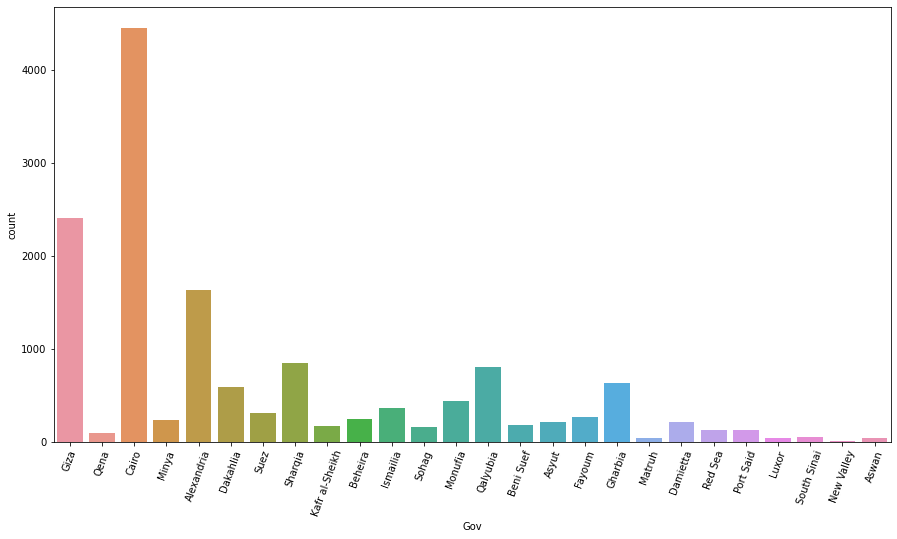

In [40]:
plt.figure(figsize=[15,8])
sns.countplot(df['Gov'])
plt.xticks(rotation=70)

#### Which govs have the most average mileage?

In [41]:
df.groupby('Gov', as_index=False)['max_kilometers'].mean().sort_values(by=['max_kilometers'], ascending=False)

,Gov,max_kilometers
1,Aswan,159523.000000
21,Red Sea,140605.318182
10,Giza,140065.610212
5,Cairo,137043.215858
9,Gharbia,136189.641270
25,Suez,135129.084416
11,Ismailia,134332.516667
22,Sharqia,134328.576471
23,Sohag,131409.397436
19,Qalyubia,131289.501241


C:\Users\Pierre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel', ylabel='count'>

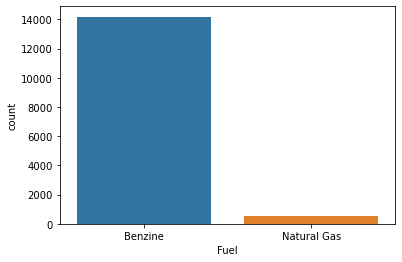

In [42]:
sns.countplot(df['Fuel'])

C:\Users\Pierre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

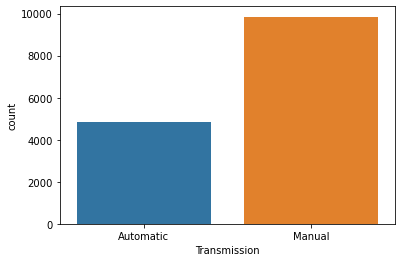

In [43]:
sns.countplot(df['Transmission'])

#### What are the most successful brands in Egypt?

C:\Users\Pierre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brand', ylabel='count'>

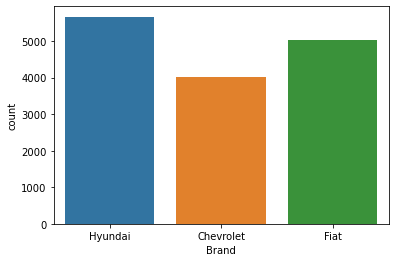

In [44]:
sns.countplot(df['Brand'])

C:\Users\Pierre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Accent'),
  Text(1, 0, 'Avante'),
  Text(2, 0, 'I10'),
  Text(3, 0, 'Elantra'),
  Text(4, 0, 'Excel'),
  Text(5, 0, 'Matrix'),
  Text(6, 0, 'Tucson'),
  Text(7, 0, 'Verna'),
  Text(8, 0, 'Cruze'),
  Text(9, 0, 'Aveo'),
  Text(10, 0, 'Lanos'),
  Text(11, 0, 'Optra'),
  Text(12, 0, '128'),
  Text(13, 0, '131'),
  Text(14, 0, 'Punto'),
  Text(15, 0, 'Shahin'),
  Text(16, 0, 'Tipo'),
  Text(17, 0, 'Uno')])

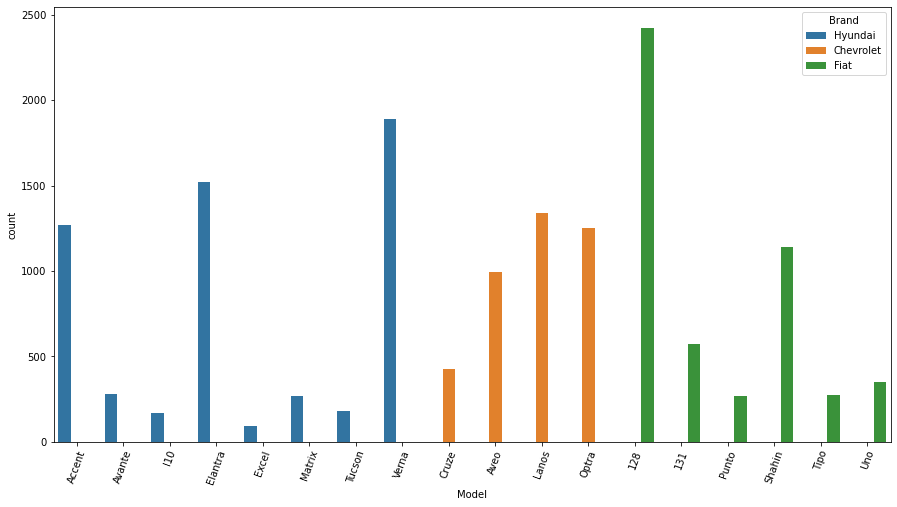

In [45]:
plt.figure(figsize=[15,8])
sns.countplot(df['Model'], hue = df['Brand'])
plt.xticks(rotation=70)

## Preprocessing 2

In [46]:
df = df.drop(['Gov'], axis = 1)

In [47]:
df.head()

,Brand,Model,Body,Year,Fuel,Engine,Transmission,Price,min_kilometers,max_kilometers
0,Hyundai,Accent,Sedan,2007,Benzine,1600,Automatic,140.0,140000,159999
1,Hyundai,Accent,Sedan,2005,Benzine,1300,Manual,78.0,180000,199999
2,Hyundai,Accent,Sedan,1999,Benzine,1500,Manual,70.0,140000,159999
3,Hyundai,Accent,Sedan,2009,Benzine,1600,Automatic,150.0,140000,159999
4,Hyundai,Accent,Sedan,2000,Benzine,1300,Manual,75.0,10000,19999


In [48]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [49]:
x = pd.get_dummies(x, drop_first=True)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Modeling and Evaluation

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)
print('R2 value', lr.score(x_test_scaled, y_test))
print('mean square error', mean_squared_error(y_test, y_pred))

R2 value 0.8520722688989398
mean square error 988.7439677549855


In [53]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)
y_pred = dt.predict(x_test_scaled)
print('R2 value', dt.score(x_test_scaled, y_test))
print('mean square error', mean_squared_error(y_test, y_pred))

R2 value 0.9004957507994009
mean square error 665.0830471797593


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)
y_pred = rf.predict(x_test_scaled)
print('R2 value', rf.score(x_test_scaled, y_test))
print('mean square error', mean_squared_error(y_test, y_pred))

R2 value 0.9111574981261583
mean square error 593.8202874754456


## Cross Validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits = 5)
score = cross_validate(rf, x_train_scaled, y_train, cv=kfold)

In [56]:
score

{'fit_time': array([1.60604453, 1.50041318, 1.41754723, 1.38390064, 1.41503906]),
 'score_time': array([0.04688072, 0.04810166, 0.03126502, 0.04686952, 0.05054617]),
 'test_score': array([0.91849334, 0.90909427, 0.90362836, 0.90719632, 0.89602198])}

In [57]:
from sklearn.model_selection import GridSearchCV
par = {'n_estimators':[100, 200, 300],'max_depth':[5,7,9]}
grid = GridSearchCV(rf, param_grid = par, cv = 5)
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [100, 200, 300]})

In [58]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [59]:
rf = RandomForestRegressor(max_depth= 9, n_estimators= 200)
rf.fit(x_train_scaled, y_train)
y_pred = rf.predict(x_test_scaled)
print('R2 value', rf.score(x_test_scaled, y_test))
print('mean square error', mean_squared_error(y_test, y_pred))

R2 value 0.9097104810914827
mean square error 603.4921005535278


In [60]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [62]:
numeric_columns = x_train.select_dtypes(exclude = 'object').columns

In [63]:
cat_columns = x_train.select_dtypes(include = 'object').columns

## Pipeline

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('impute', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler(with_mean=False))])
cat_transformer = Pipeline([('impute', SimpleImputer(strategy='most_frequent')),
                            ('encode', OneHotEncoder()),
                            ('scaler', StandardScaler(with_mean=False))])

In [67]:
from sklearn.compose import ColumnTransformer
preprocess = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_columns),
                                             ('cat', cat_transformer, cat_columns)])

In [68]:
preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Year', 'Engine', 'min_kilometers', 'max_kilometers'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Brand', 'Model', 'Body', 'Fuel', 'Transmission'], dtype='object'))])

In [69]:
pipe = Pipeline([('preprocessing', preprocess),
                 ('model', RandomForestRegressor(max_depth= 9, n_estimators= 300))])

In [70]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Year', 'Engine', 'min_kilometers', 'max_kilometers'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder()),
               

In [71]:
import joblib
joblib.dump(pipe, 'final_pr_model.pkl')

['final_pr_model.pkl']

## Deployment

In [72]:
! pip install streamlit

In [73]:
x_train

,Brand,Model,Body,Year,Fuel,Engine,Transmission,min_kilometers,max_kilometers
13822,Fiat,Punto,Hatchback,1998,Benzine,1300,Manual,0,9999
1579,Hyundai,Elantra,Sedan,2013,Benzine,1600,Automatic,140000,159999
1599,Hyundai,Elantra,Sedan,2010,Benzine,1600,Automatic,140000,159999
13020,Fiat,128,Sedan,1982,Benzine,1300,Manual,180000,199999
2390,Hyundai,Verna,Sedan,2010,Benzine,1600,Manual,160000,179999
...,...,...,...,...,...,...,...,...,...
13147,Fiat,128,Sedan,1974,Benzine,1300,Manual,200000,300000
3279,Hyundai,Accent,Sedan,2022,Benzine,1600,Automatic,0,9999
9869,Fiat,128,Sedan,1981,Benzine,1300,Manual,180000,199999
10823,Fiat,128,Sedan,1990,Benzine,1300,Manual,120000,139999


In [76]:
%%writefile app.py
import numpy as np
import pandas as pd
import streamlit as st 
import joblib

regressor=joblib.load('final_pr_model.pkl')

def welcome():
    return "Welcome"

def predict_price(Brand,Model,Body,Year,Fuel,Engine,Transmission,min_kilometers,max_kilometers):
    prediction = regressor.predict(pd.DataFrame({'Brand':[Brand],
                                                 'Model':[Model],
                                                 'Body':[Body],
                                                 'Year':[Year],
                                                 'Fuel':[Fuel],
                                                 'Engine':[Engine],
                                                 'Transmission':[Transmission],
                                                 'min_kilometers':[min_kilometers],
                                                 'max_kilometers':[max_kilometers]}))
    print("The Price predicted is ")
    return prediction

def main():
    st.title("Used Cars in Egypt Price Prediction")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Used Cars in Egypt App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    Brand = st.text_input('Brand', 'Type Here')
    Model = st.text_input('Model', 'Type Here')
    Body = st.text_input('Body', 'Type Here')
    Year = st.text_input('Year', 'Type Here')
    Fuel = st.text_input('Fuel', 'Type Here')
    Engine = st.text_input('Engine', 'Type Here')
    Transmission = st.text_input('Transmission', 'Type Here')
    min_kilometers = st.text_input('min_kilometers', 'Type Here')
    max_kilometers = st.text_input('max_kilometers', 'Type Here')
    result = ""
    
    if st.button("Predict Price"):
        result = predict_price(Brand,Model,Body,Year,Fuel,Engine,Transmission,min_kilometers,max_kilometers)
        
    st.success('The Price is {} thousands in EGP'.format(result))
    
if __name__=='__main__':
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py